# Part I - (Forde GoBike System Data)
## by Fulwah Alarifi

## Introduction

This project dives into the *Ford GoBike trip data* from February 2019, covering over 180,000 rides across the* San Francisco Bay Area*. Each entry includes how long the trip lasted, where it started and ended, when it happened, and some details about the rider like their gender ,birth year, and whether they’re a subscriber or a casual user.

The goal is to clean up the data, dig into it, and pull out useful insights about how people move around the city. The process is laid out with easy-to-follow markdown sections, reusable code, and clear comments to make everything efficient and easy to replicate.


##Preliminary Wrangling

In [2]:
#packages and set plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Loading the data set
df = pd.read_csv('/content/201902-fordgobike-tripdata.csv', engine='python')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

The dataset is a structured DataFrame with 183,412 rows and 16 columns, where each row represents a bike trip from February 2019. It includes a mix of numbers, categories, and dates. Some station info and rider details are missing in a few entries.


### What is/are the main feature(s) of interest in your dataset?
The primary features of interest are:

**duration_sec** (trip duration)

**user_type** (Subscriber vs. Customer)

These features help analyze how different types of users utilize the bike-sharing system in terms of trip length and usage frequency.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

To support analysis of trip duration and user behavior, the following features are particularly useful:

**start_time / end_time:** to derive time-based patterns (e.g., rush hours, weekdays vs. weekends)

**start_station_name / end_station_name**: to identify popular routes and stations

**member_gender and member_birth_year:** to analyze demographic trends

**bike_share_for_all_trip:** to examine accessibility and inclusion-related usage patterns

These features allow for a deeper understanding of usage behavior across different user segments and time periods.

## Univariate Exploration



In [4]:
#good practice
def set_plot_labels(title, xlabel, ylabel, legend=True):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend:
        plt.legend()


/tmp/ipython-input-4-229286775.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


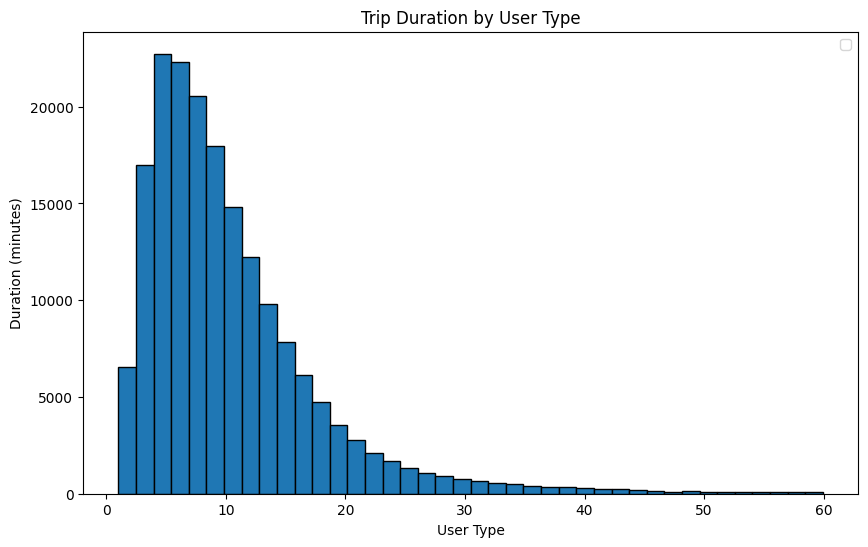

In [8]:
# Convert duration from seconds to minutes
df['duration_min'] = df['duration_sec'] / 60

# Filter for reasonable durations (under 60 min) to reduce effect of outliers
df_filtered = df[df['duration_min'] <= 60]

plt.figure(figsize=(10,6))
plt.hist(df_filtered['duration_min'], bins=40, edgecolor='black')
set_plot_labels("Trip Duration by User Type", "User Type", "Duration (minutes)")



Most trips are under 20 minutes.

There is a long tail of higher durations, indicating a few unusually long trips (possible outliers).

Filtering out trips above 60 minutes helps focus on typical usage.

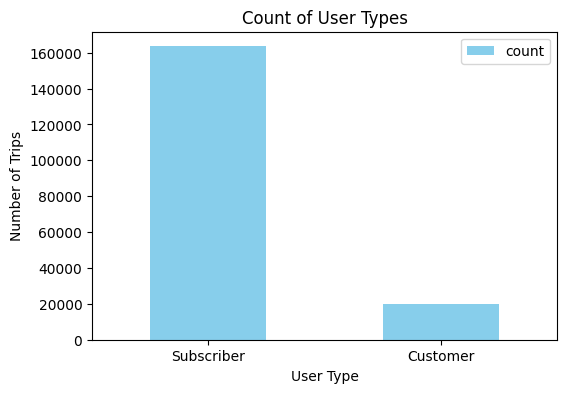

In [10]:
#The distribution of user types
plt.figure(figsize=(6, 4))
df['user_type'].value_counts().plot(kind='bar', color='skyblue')
set_plot_labels('Count of User Types', "User Type", 'Number of Trips')
plt.xticks(rotation=0)
plt.show()


Most trips are made by Subscribers, indicating that the majority of users are regular riders.

Customers (casual users) make up a smaller portion of the dataset.

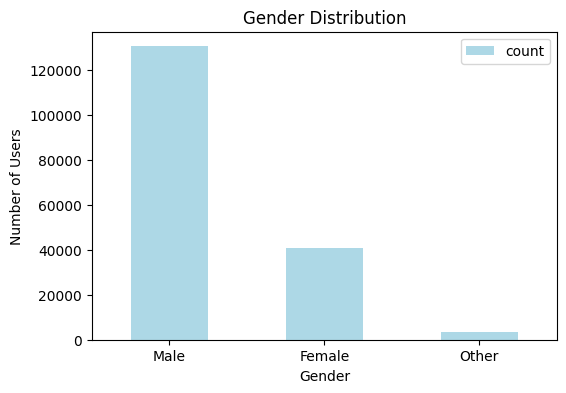

In [11]:
#The gender distribution
plt.figure(figsize=(6, 4))
df['member_gender'].value_counts().plot(kind='bar', color='lightblue')
set_plot_labels('Gender Distribution', "Gender", 'Number of Users')
plt.xticks(rotation=0)

plt.show()


Male riders form the majority of users.

There is a significant number of riders marked as "Other" or with missing values that were excluded by default in value_counts().

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Trip durations are heavily right-skewed, with most rides falling between 5 and 15 minutes. After the 20-minute mark, the number of trips drops off quickly. This suggests that short rides are the norm, which makes sense for a city bike-share system.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

No log transformation was needed at this stage, but outliers beyond 60 minutes will be further evaluated during multivariate analysis or cleaning.

## Bivariate Exploration


/tmp/ipython-input-4-229286775.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


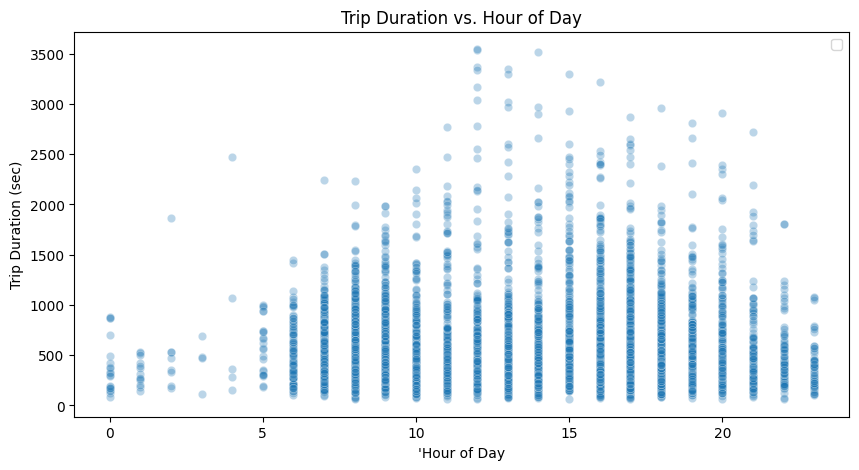

In [12]:
#Trip Duration vs. Start Time using scatter plot
# Extract hour from start time
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour

# Filter duration under 60 min for clarity
df_filtered = df[df['duration_sec'] <= 3600]

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_filtered.sample(5000), x='start_hour', y='duration_sec', alpha=0.3)
set_plot_labels('Trip Duration vs. Hour of Day', "'Hour of Day", 'Trip Duration (sec)')

#display
plt.show()



Most trips are shorter and clustered around morning (8–9 AM) and evening (5–6 PM) rush hours.

Outliers exist across all hours but are more dispersed during midday.



/tmp/ipython-input-4-229286775.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


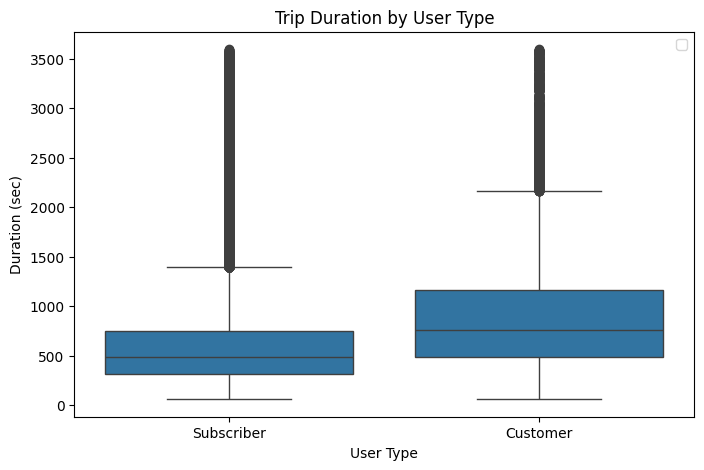

In [13]:
#Trip Duration by User Type using Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='user_type', y='duration_sec')
set_plot_labels('Trip Duration by User Type', 'User Type', 'Duration (sec)')

plt.show()


Customers generally take longer trips than Subscribers.

Subscribers’ durations are more consistent and tightly clustered.

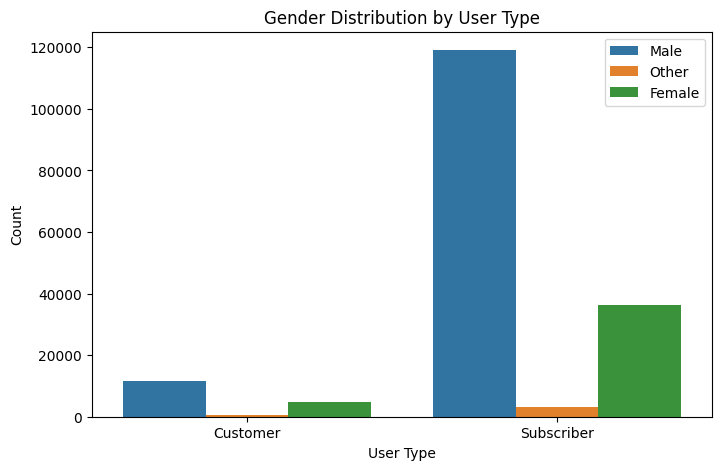

In [15]:
#User Type vs. Gender by Clustered Bar Chart
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='user_type', hue='member_gender')
set_plot_labels('Gender Distribution by User Type','User Type','Count')

plt.show()

Male users dominate both user types.

Female users are more common among subscribers than among casual users.

/tmp/ipython-input-4-229286775.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


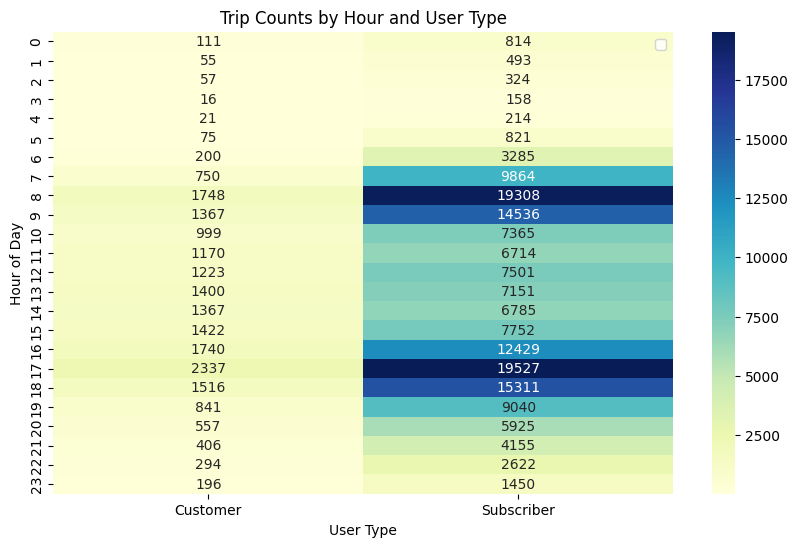

In [16]:
#Trip Volume by Hour and User Type using Heatmap
# Group by hour and user type
hourly_usage = df.groupby(['start_hour', 'user_type']).size().unstack()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_usage, cmap='YlGnBu', annot=True, fmt='g')
set_plot_labels('Trip Counts by Hour and User Type','User Type','Hour of Day' )

#display
plt.show()


Subscribers show clear commuting patterns: peaks around 8 AM and 5 PM.

Customers use bikes more evenly throughout the day, with a slight afternoon peak.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

**Trip Duration vs. User Type:**
The box plot shows that Customers usually take longer rides than Subscribers. This points to Customers using the bikes more for leisure or occasional trips, while Subscribers, who tend to ride for shorter periods, likely use the bikes for regular commuting or short-distance travel.

**Trip Counts by Hour and User Type:**
The heatmap shows clear spikes for Subscribers around 8 AM and again around 5–6 PM—classic commute times. Customers, on the other hand, have a much flatter pattern, with their rides more spread out and peaking midday, though in much lower numbers. This adds to the idea that Subscribers are commuting and Customers ride more casually.

**Trip Duration vs. Hour of Day:**
The scatter plot shows trip durations stay pretty steady throughout the day, but there’s a small bump in longer rides during midday and the afternoon. Still, most trips are short, which fits with the typical habits of daily commuters.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

**Gender Distribution by User Type:**
The bar chart shows that most Subscribers are male, with a noticeable number of female riders too. For Customers, the overall numbers are lower, but the gender difference isn’t as wide. The “Other” category appears in both groups but in very small numbers.

**Hourly Patterns by User Type (Heatmap):**
The heatmap clearly shows Subscribers riding most during commute times—early morning and late afternoon. Customers, meanwhile, ride more evenly throughout the day without sharp spikes. This highlights the contrast in how each group uses the service: Subscribers likely stick to a routine, while Customers ride whenever it suits them.


## Multivariate Exploration


/tmp/ipython-input-18-972754736.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


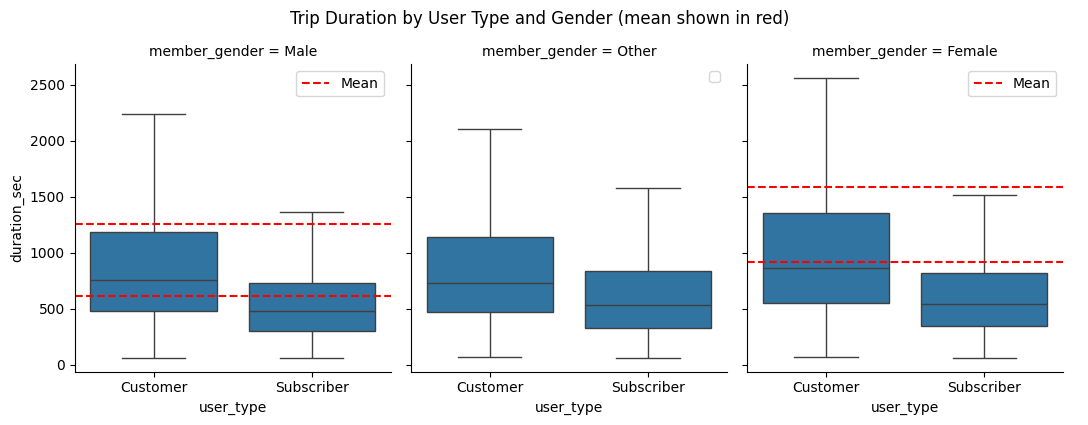

In [18]:
# finding the relationship between trip duration depending on thegender and user

#defining df_cleaned
df_cleaned = df.copy()

# type by using Facet Plot Add 'age' column
df_cleaned['age'] = 2024 - df['member_birth_year']

# Facet plot: Boxplot of trip duration, by user type, faceted by gender
g = sns.catplot(
    data=df,
    x="user_type", y="duration_sec", col="member_gender",
    kind="box", showfliers=False, height=4, aspect=0.9
)
# Add average line for each plot
for ax, gender in zip(g.axes[0], df['member_gender'].unique()):
    # Exclude NaN values from the calculation
    avg = df[df['member_gender']==gender].groupby('user_type')['duration_sec'].mean()
    for i, user_type in enumerate(avg.index):
        ax.axhline(avg[user_type], ls="--", color="red", label="Mean" if i==0 else "")
    ax.legend()
g.fig.suptitle("Trip Duration by User Type and Gender (mean shown in red)", y=1.05)
plt.show()


This facet plot shows that across all genders, Customers consistently take longer rides than Subscribers.

The red lines—showing the mean—are always higher for Customers.

While the general pattern holds across genders, there are some slight differences in the median and range. Notably, female Customers have the highest average trip durations.

Overall, this plot makes it clear that user type has a big influence on how long people ride, no matter their gender.



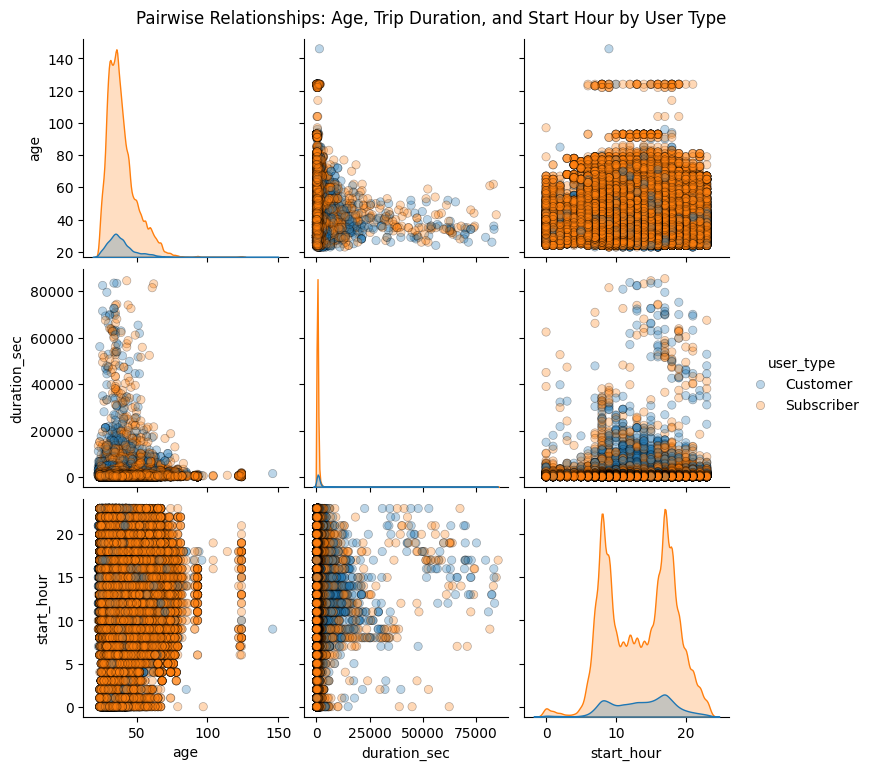

In [19]:

#Exploring Age, Duration, and Start Hour by User Type

sns.pairplot(
    df_cleaned,
    vars=["age", "duration_sec", "start_hour"],
    hue="user_type",
    plot_kws={"alpha": 0.3, "edgecolor": "k"},
    diag_kind="kde"
)
plt.suptitle("Pairwise Relationships: Age, Trip Duration, and Start Hour by User Type", y=1.02)
plt.show()

This plot matrix shows how age, trip duration, and start hour relate to each other, with colors separating Subscribers and Customers. The diagonals show how each variable is distributed, while the scatterplots reveal their pairwise relationships.

**Age vs. Duration:** Most riders are between 20 and 60 years old. Subscribers usually take shorter trips, while Customers are more spread out with longer durations.

**Age vs. Start Hour:** There's no strong link here—riders of all ages are active throughout the day.

**Duration vs. Start Hour:** Most trips are short and happen during commute hours, especially for Subscribers.

Overall, the patterns and distributions are clearly different between Subscribers and Customers, which lines up with what we've seen in their riding habits.


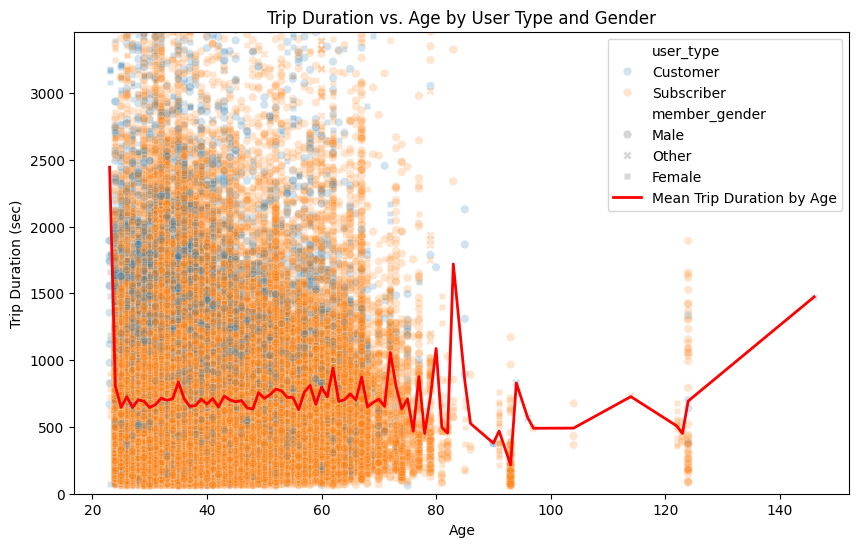

In [20]:
# Calculate mean trip duration by age
mean_duration_by_age = df_cleaned.groupby("age")["duration_sec"].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned,
    x="age", y="duration_sec",
    hue="user_type",
    style="member_gender", # Change 'gender' to 'member_gender'
    alpha=0.2
)

# Overlay line for average trip duration by age
plt.plot(mean_duration_by_age.index, mean_duration_by_age.values, color='red', lw=2, label='Mean Trip Duration by Age')

set_plot_labels('Trip Duration vs. Age by User Type and Gender', "Age", 'Trip Duration (sec)')
plt.ylim(0, np.percentile(df_cleaned['duration_sec'], 99)) # Trim outliers for clarity
plt.show()

Most riders fall between 20 and 60 years old, and trip times usually stay under 1,500 seconds. Younger riders seem to take slightly longer trips, and Customers generally ride longer than Subscribers. The red line stays pretty steady across most ages, but it gets more scattered with older riders—probably because there aren’t as many of them in the dataset.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

**User Type and Trip Duration:**
Customers consistently took longer trips than Subscribers, no matter the age or gender. This lines up with earlier findings that Subscribers are mostly using the bikes for quick, regular commutes, while Customers tend to take longer, likely more casual or recreational rides.

**Age and Trip Duration:**
Younger riders, especially among Customers, tend to have slightly longer trip durations. Still, the average trip time stays pretty steady for the main age group (20–60), which shows that user type plays a bigger role in trip length than age does.

**Gender Patterns:**
The boxplots show the same trend across all genders—Customers ride longer than Subscribers. This suggests that the link between user type and trip duration holds strong, regardless of gender.


### Were there any interesting or surprising interactions between features?

**Older Users:**
There's a noticeable bump in average trip time for riders over 70, shown by the red mean line in the scatterplot. This could be due to a few outliers or just fewer older riders in the dataset, or it might hint at a different way older users are using the bikes.

**Peak Usage Times:**
The pairplot shows that Subscribers mostly ride during the morning and evening commute hours. In contrast, Customer trips are more spread out during the day, especially around midday. This is clear when looking at the relationship between start hour, trip duration, and user type.

**Gender Differences:**
While the overall trend stays the same across genders—Customers ride longer than Subscribers—the boxplots show that female Customers have the highest average trip times. This might point to different trip purposes or preferences within the Customer group based on gender.


## Conclusions

###Summary of Main Findings

**Subscribers vs. Customers:**
Subscribers typically take shorter, more regular trips, likely for commuting. Customers, on the other hand, take longer rides regardless of their age or gender—suggesting more casual or recreational use.

**Trip Timing:**
Subscriber rides are concentrated around commute hours—mornings and evenings—pointing to daily transportation. Customer trips are more evenly spread throughout the day, which fits with a more flexible or leisure-oriented use.

**Age Patterns:**
Most riders are between 20 and 60, and trip durations are fairly steady across this range. Younger users tend to take slightly longer trips. There's a noticeable spike in average trip time for users over 70, which could be a real pattern or just noise from fewer data points.

**Gender Differences:**
The difference in trip length between Subscribers and Customers holds for all genders. Among them, female Customers have the highest average trip durations, hinting at possible differences in trip purpose or habits.

**Feature Interactions:**
User type stands out as the best predictor of trip duration. Age and gender add some extra detail but don’t shift the overall pattern. There's no clear link between age and when people start their trips—riders of all ages use the service throughout the day.

---

###Reflection on Data Exploration Steps

The process started with cleaning the data and creating useful fields like rider age.
From there, univariate and bivariate analysis helped surface the main trends.
Multivariate plots—like facet grids, pairplots, and annotated scatterplots—helped show how trip duration, user type, age, gender, and trip timing all connect.
Adding annotations and using the right visual encodings made it easier to spot and explain the key patterns throughout the analysis.
